In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys
import os 
import re
import string
from math import*
import jellyfish
import gensim
from os import path
from nltk.corpus import stopwords

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import pickle
import gensim

In [2]:
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
#from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

In [3]:
import warnings
warnings.simplefilter('ignore')

In [5]:
df_final=pd.read_csv('D:/Stats&ML/quora-question-pairs/df_final_avg.csv',encoding='latin-1')

In [6]:
nan_rows = df_final[df_final.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, is_duplicate, freq_qid1_x, freq_qid2_x, q1len_x, q2len_x, q1_n_words_x, q2_n_words_x, word_share_x, freq_q1+q2_x, freq_q1-q2_x, cwc_min_x, cwc_max_x, csc_min_x, csc_max_x, ctc_min_x, ctc_max_x, last_word_eq_x, first_word_eq_x, abs_len_diff_x, mean_len_x, token_set_ratio_x, token_sort_ratio_x, fuzz_ratio_x, fuzz_partial_ratio_x, longest_substr_ratio_x, Word_Mover_Dist, dist_cosine, dist_cityblock, dist_canberra, dist_euclidean, dist_minkowski, freq_qid1_y, freq_qid2_y, q1len_y, q2len_y, q1_n_words_y, q2_n_words_y, word_share_y, freq_q1+q2_y, freq_q1-q2_y, cwc_min_y, cwc_max_y, csc_min_y, csc_max_y, ctc_min_y, ctc_max_y, last_word_eq_y, first_word_eq_y, abs_len_diff_y, mean_len_y, token_set_ratio_y, token_sort_ratio_y, fuzz_ratio_y, fuzz_partial_ratio_y, longest_substr_ratio_y, index, 0_x, 1_x, 2_x, 3_x, 4_x, 5_x, 6_x, 7_x, 8_x, 9_x, 10_x, 11_x, 12_x, 13_x, 14_x, 15_x, 16_x, 17_x, 18_x, 19_x, 20_x, 21_x, 22_x, 23_x, 24_x, 25_x, 26_x, 27_x, 28_x, 29_x, 30_x, 

In [7]:
duplicate = df_final.is_duplicate
df_final = df_final.drop(['id','is_duplicate','index','q1_n_words_y','q1_n_words_x','q2_n_words_y','q2_n_words_x'],axis=1)

In [8]:
df_final = df_final.drop(['freq_qid1_y',
       'freq_qid2_y', 'q1len_y', 'q2len_y', 'word_share_y',
       'freq_q1+q2_y', 'freq_q1-q2_y', 'cwc_min_y', 'cwc_max_y',
       'csc_min_y', 'csc_max_y', 'ctc_min_y', 'ctc_max_y',
       'last_word_eq_y', 'first_word_eq_y', 'abs_len_diff_y',
       'mean_len_y', 'token_set_ratio_y', 'token_sort_ratio_y',
       'fuzz_ratio_y', 'fuzz_partial_ratio_y', 'longest_substr_ratio_y'],axis=1)

In [9]:
X_train,X_test, y_train, y_test = train_test_split(df_final,duplicate, stratify=duplicate, test_size=0.3,random_state=13)

In [10]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6307985865724381 Class 1:  0.36920141342756185
---------- Distribution of output variable in test data ----------
Class 0:  0.3691986775169639 Class 1:  0.3691986775169639


In [11]:
scale_col = ['freq_qid1_x', 'freq_qid2_x', 'q1len_x', 'q2len_x', 'word_share_x',
       'freq_q1+q2_x', 'freq_q1-q2_x', 'cwc_min_x', 'cwc_max_x',
       'csc_min_x', 'csc_max_x', 'ctc_min_x', 'ctc_max_x',
       'last_word_eq_x', 'first_word_eq_x', 'abs_len_diff_x',
       'mean_len_x', 'token_set_ratio_x', 'token_sort_ratio_x',
       'fuzz_ratio_x', 'fuzz_partial_ratio_x', 'longest_substr_ratio_x',
       'Word_Mover_Dist', 'dist_cosine', 'dist_cityblock',
       'dist_canberra', 'dist_euclidean', 'dist_minkowski']

In [12]:
X_train_scale = X_train[scale_col]
X_test_scale = X_test[scale_col]

In [13]:
X_train_w2v = X_train.drop(scale_col,axis=1)
X_test_w2v = X_test.drop(scale_col,axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
X_train_sc = scale.fit_transform(X_train_scale)
X_test_sc = scale.transform(X_test_scale)
X_train_sc = pd.DataFrame(X_train_sc,columns=X_train_scale.columns)
X_test_sc = pd.DataFrame(X_test_sc,columns=X_test_scale.columns)

In [15]:
## Final train and test vectors after scaling of normal features 
X_train_fi = pd.DataFrame(np.hstack((X_train_sc.values,X_train_w2v.values)),columns=df_final.columns)
X_test_fi = pd.DataFrame(np.hstack((X_test_sc.values,X_test_w2v.values)),columns=df_final.columns)

In [17]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)    
    A =(((C.T)/(C.sum(axis=1))).T)
   
    B =(C/C.sum(axis=0))
  
 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

# Logistic Regression:

For values of alpha =  1e-05 The log loss is: 0.42611643195306664
For values of alpha =  0.0001 The log loss is: 0.3918839100079612
For values of alpha =  0.001 The log loss is: 0.39002293653980374
For values of alpha =  0.01 The log loss is: 0.40383350042417465
For values of alpha =  0.1 The log loss is: 0.4482236309698061
For values of alpha =  1 The log loss is: 0.49845128690776874
For values of alpha =  10 The log loss is: 0.5255832171354856


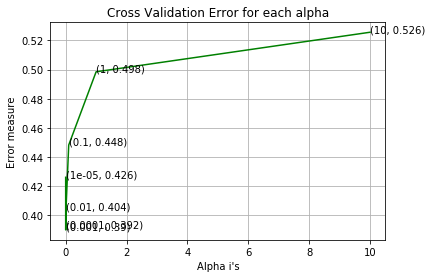

For values of best alpha =  0.001 The train log loss is: 0.38739340710271813
For values of best alpha =  0.001 The test log loss is: 0.39002293653980374
Total number of data points : 121287


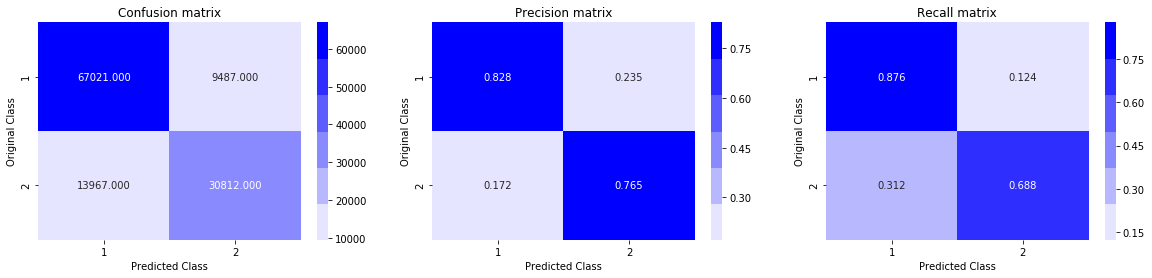

In [18]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_fi, y_train)
    predict_y = sig_clf.predict_proba(X_test_fi)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_fi, y_train)

predict_y = sig_clf.predict_proba(X_train_fi)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_fi)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

For values of alpha =  0.000586 The log loss is: 0.3895116150212781
For values of alpha =  0.000598 The log loss is: 0.3895216902570705
For values of alpha =  0.000664 The log loss is: 0.38958640642463405
For values of alpha =  0.000699 The log loss is: 0.38962364090184726
For values of alpha =  0.001323 The log loss is: 0.3905226173134113
For values of alpha =  0.001574 The log loss is: 0.39093262509803156
For values of alpha =  0.002124 The log loss is: 0.391862986483124
For values of alpha =  0.002518 The log loss is: 0.3925491265549399
For values of alpha =  0.002659 The log loss is: 0.39279113577699953
For values of alpha =  0.002889 The log loss is: 0.39319506227151907
For values of alpha =  0.00304 The log loss is: 0.39345654620348774
For values of alpha =  0.003748 The log loss is: 0.39467109596491157
For values of alpha =  0.004153 The log loss is: 0.3953476957576987
For values of alpha =  0.004866 The log loss is: 0.3965310891195544


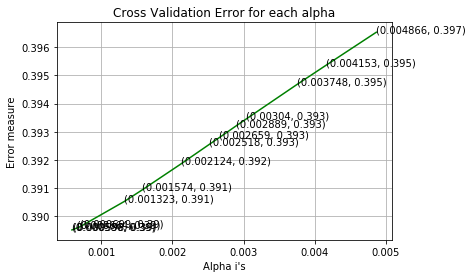

For values of best alpha =  0.000586 The train log loss is: 0.38675932263621016
For values of best alpha =  0.000586 The test log loss is: 0.3895116150212781
Total number of data points : 121287


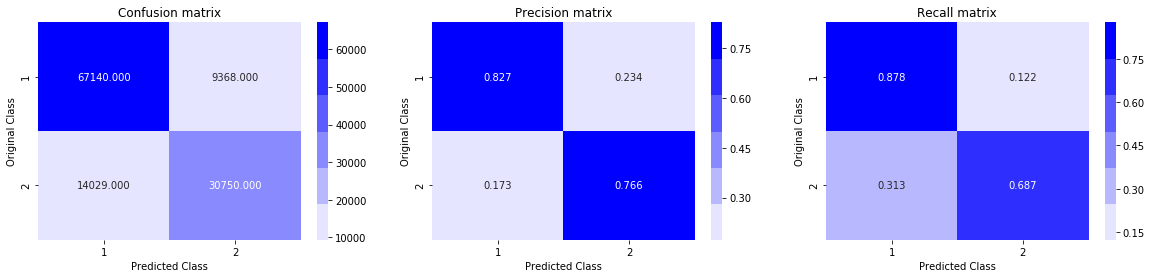

In [21]:
alpha = np.random.uniform(0.0005,0.005,14)
alpha = np.round(alpha,6)
alpha.sort()
log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_fi, y_train)
    predict_y = sig_clf.predict_proba(X_test_fi)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_fi, y_train)

predict_y = sig_clf.predict_proba(X_train_fi)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_fi)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# SVM

For values of alpha =  1e-05 The log loss is: 0.4284916684407138
For values of alpha =  0.0001 The log loss is: 0.40259751929822835
For values of alpha =  0.001 The log loss is: 0.3946621885319982
For values of alpha =  0.01 The log loss is: 0.4010315725117366
For values of alpha =  0.1 The log loss is: 0.43354393202480607
For values of alpha =  1 The log loss is: 0.48345896102664804
For values of alpha =  10 The log loss is: 0.5135466305042701


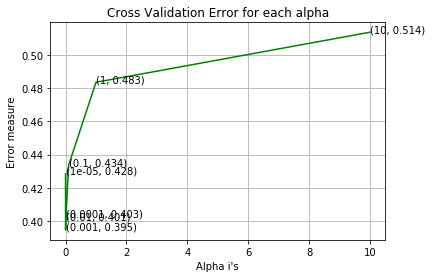

For values of best alpha =  0.001 The train log loss is: 0.3911738895013547
For values of best alpha =  0.001 The test log loss is: 0.3946621885319982
Total number of data points : 121287


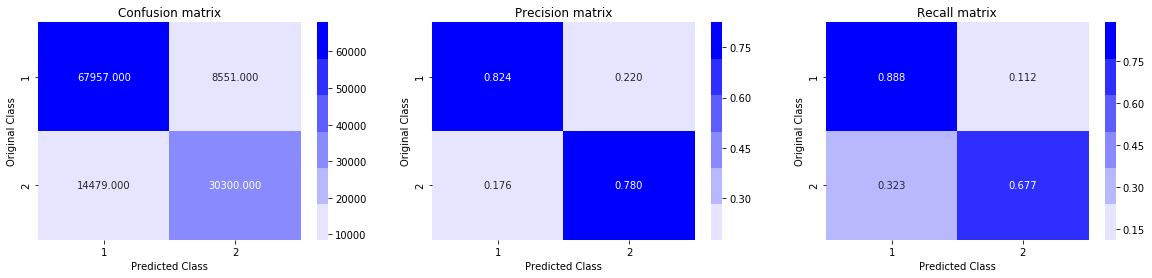

In [22]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_fi, y_train)
    predict_y = sig_clf.predict_proba(X_test_fi)
    log_error_array.append(log_loss(y_test, predict_y, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_fi, y_train)

predict_y = sig_clf.predict_proba(X_train_fi)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y,eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_fi)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y,eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

# XGBoost

In [23]:
import xgboost as xgb

estimators =  100 Train Log Loss  0.3536329662218017 Test Log Loss  0.35453302975612505
estimators =  150 Train Log Loss  0.34031402034390823 Test Log Loss  0.3425151502393887
estimators =  200 Train Log Loss  0.33193669652486596 Test Log Loss  0.3355099516084892
estimators =  300 Train Log Loss  0.3211591325415673 Test Log Loss  0.32743394879425375
estimators =  400 Train Log Loss  0.3135641561937021 Test Log Loss  0.32236409510949215
estimators =  600 Train Log Loss  0.30299904430295255 Test Log Loss  0.3168481302131921
estimators =  800 Train Log Loss  0.2950345622834905 Test Log Loss  0.31360469807788266


Text(0, 0.5, 'Log Loss')

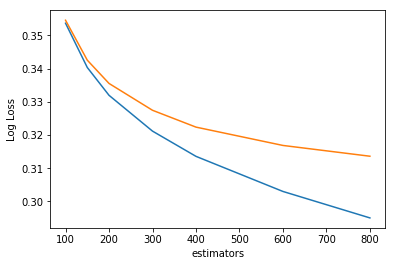

In [24]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=i,n_jobs=-1)
    clf.fit(X_train_fi,y_train)
    predict_y = clf.predict_proba(X_train_fi)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test_fi)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators')
plt.ylabel('Log Loss')

The test log loss is: 0.32427222271831607


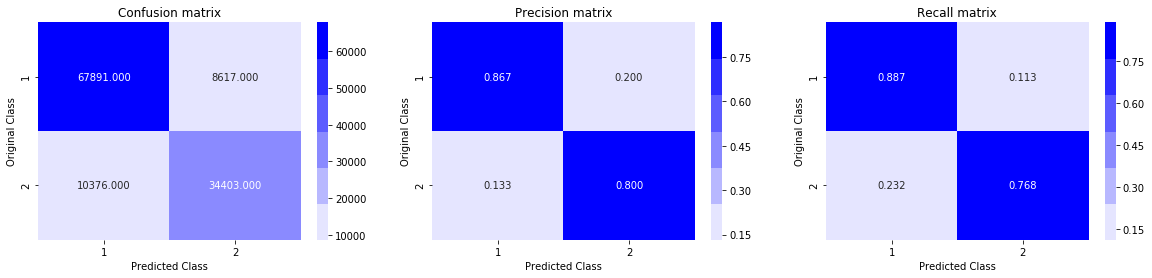

In [20]:
clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.12,n_estimators=600,
                        min_child_weight=5,
                        reg_alpha=150,reg_lambda=350,n_jobs=-1)
clf.fit(X_train_fi,y_train)
predict_y = clf.predict_proba(X_test_fi)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)

In [25]:
np.array(X_train_fi.columns)[np.argsort(clf.feature_importances_)[::-1]][0:50]

array(['word_share_x', 'cwc_max_x', 'freq_qid1_x', 'freq_qid2_x',
       'cwc_min_x', 'token_sort_ratio_x', 'csc_max_x', 'dist_canberra',
       'fuzz_ratio_x', 'longest_substr_ratio_x', 'freq_q1+q2_x',
       'freq_q1-q2_x', 'dist_cityblock', 'ctc_max_x', 'q1len_x',
       'last_word_eq_x', 'Word_Mover_Dist', 'csc_min_x',
       'fuzz_partial_ratio_x', 'token_set_ratio_x', 'ctc_min_x',
       'q2len_x', 'mean_len_x', 'first_word_eq_x', '17_y', '105_y',
       'abs_len_diff_x', 'dist_euclidean', '105_x', '86_x', 'dist_cosine',
       '9_y', '10_y', '255_y', '235_y', '17_x', '86_y', '172_x', '56_x',
       '111_y', '140_y', '292_x', '194_x', '258_y', '176_x', '149_y',
       '173_y', '125_y', '189_y', '51_y'], dtype=object)

Trained XGBoost on data dropping avg word vectors with below columns

In [26]:
X_train_scale.columns

Index(['freq_qid1_x', 'freq_qid2_x', 'q1len_x', 'q2len_x', 'word_share_x',
       'freq_q1+q2_x', 'freq_q1-q2_x', 'cwc_min_x', 'cwc_max_x', 'csc_min_x',
       'csc_max_x', 'ctc_min_x', 'ctc_max_x', 'last_word_eq_x',
       'first_word_eq_x', 'abs_len_diff_x', 'mean_len_x', 'token_set_ratio_x',
       'token_sort_ratio_x', 'fuzz_ratio_x', 'fuzz_partial_ratio_x',
       'longest_substr_ratio_x', 'Word_Mover_Dist', 'dist_cosine',
       'dist_cityblock', 'dist_canberra', 'dist_euclidean', 'dist_minkowski'],
      dtype='object')

estimators =  100 Train Log Loss  0.3548453002479945 Test Log Loss  0.3548715085118789
estimators =  150 Train Log Loss  0.3448793083614364 Test Log Loss  0.3457290597424595
estimators =  200 Train Log Loss  0.3386358373918343 Test Log Loss  0.3400994238258822
estimators =  300 Train Log Loss  0.3313265789159618 Test Log Loss  0.3340263014469015
estimators =  400 Train Log Loss  0.32703109967557853 Test Log Loss  0.33087600008609874
estimators =  600 Train Log Loss  0.32109721311357436 Test Log Loss  0.3271127546675687
estimators =  800 Train Log Loss  0.3170766804684163 Test Log Loss  0.3251893954646065


Text(0, 0.5, 'Log Loss')

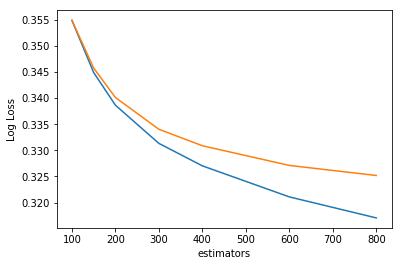

In [27]:
estimators = [100,150,200,300,400,600,800]
test_scores = []
train_scores = []
for i in estimators:
    clf = xgb.XGBClassifier(max_depth=3,learning_rate=0.1,n_estimators=i,n_jobs=-1)
    clf.fit(X_train_scale,y_train)
    predict_y = clf.predict_proba(X_train_scale)
    log_loss_train = log_loss(y_train, predict_y, eps=1e-15)
    train_scores.append(log_loss_train)
    predict_y = clf.predict_proba(X_test_scale)
    log_loss_test = log_loss(y_test, predict_y, eps=1e-15)
    test_scores.append(log_loss_test)
    print('estimators = ',i,'Train Log Loss ',log_loss_train,'Test Log Loss ',log_loss_test)
plt.plot(estimators,train_scores,label='Train Log Loss')
plt.plot(estimators,test_scores,label='Test Log Loss')
plt.xlabel('estimators')
plt.ylabel('Log Loss')

The test log loss is: 0.3342866177656045


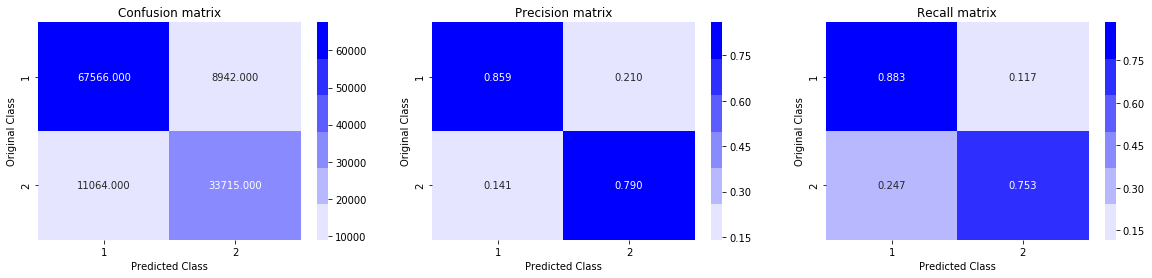

In [41]:
clf = xgb.XGBClassifier(max_depth=4,learning_rate=0.1,n_estimators=500,
                        min_child_weight=6,
                        reg_alpha=120,reg_lambda=115,
                        gamma=3,colsample_bytree=0.9,n_jobs=-1)
clf.fit(X_train_scale,y_train)
predict_y = clf.predict_proba(X_test_scale)
print("The test log loss is:",log_loss(y_test, predict_y, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
plot_confusion_matrix(y_test, predicted_y)